# How to setup a new env for this notebook 
- Tutorial - https://www.youtube.com/watch?v=D9sU1hLT0QY
- conda create --name rl_37 python=3.7
- https://stackoverflow.com/questions/53004311/how-to-add-conda-environment-to-jupyter-lab
- How to setup github repo from local https://gist.github.com/alexpchin/102854243cd066f8b88e
- https://github.com/nicknochnack/Reinforcement-Learning-for-Trading

# Imports

In [1]:
# Gym stuff
import gym
import gym_anytrading

# Stable baselines - rl stuff
from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines import A2C

# Processing libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

C:\Users\shakt\.conda\envs\rl_37\lib\site-packages\tensorflow_core\python\framework\dtypes.py:597: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.object,
C:\Users\shakt\.conda\envs\rl_37\lib\site-packages\tensorflow_core\python\framework\dtypes.py:605: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.bool,
C:\Users\shakt\.conda\envs\rl_37\lib\site-packages\tensorflow_core\python\framework\tensor_util.py:174: 

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



C:\Users\shakt\.conda\envs\rl_37\lib\site-packages\stable_baselines\__init__.py:33: UserWarning: stable-baselines is in maintenance mode, please use [Stable-Baselines3 (SB3)](https://github.com/DLR-RM/stable-baselines3) for an up-to-date version. You can find a [migration guide](https://stable-baselines3.readthedocs.io/en/master/guide/migration.html) in SB3 documentation.
  "stable-baselines is in maintenance mode, please use [Stable-Baselines3 (SB3)](https://github.com/DLR-RM/stable-baselines3) for an up-to-date version. You can find a [migration guide](https://stable-baselines3.readthedocs.io/en/master/guide/migration.html) in SB3 documentation."


# Download Data

In [2]:
df = pd.read_csv('data/gmedata.csv')


In [3]:
df.head()

,Date,Open,High,Low,Close,Volume
0,03/12/2021,275.00,295.50,262.27,264.5,"25,845,900"
1,03/11/2021,241.64,281.50,232.60,260.0,"28,312,490"
2,03/10/2021,269.43,348.50,172.00,265.0,"71,570,570"
3,03/09/2021,217.71,249.85,208.51,246.9,"39,099,328"
4,03/08/2021,154.89,210.87,146.10,194.5,"63,565,621"


In [4]:
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close            float64
Volume            object
dtype: object

In [5]:
df.set_index('Date', inplace=True)
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2021-03-12,275.00,295.50,262.27,264.5,"25,845,900"
2021-03-11,241.64,281.50,232.60,260.0,"28,312,490"
2021-03-10,269.43,348.50,172.00,265.0,"71,570,570"
2021-03-09,217.71,249.85,208.51,246.9,"39,099,328"
2021-03-08,154.89,210.87,146.10,194.5,"63,565,621"


In [6]:
env = gym.make('stocks-v0', df=df, frame_bound=(5,100), window_size=5)


In [7]:
env.prices

array([264.5 , 260.  , 265.  , 246.9 , 194.5 , 137.74, 132.35, 124.18,
       118.18, 120.4 , 101.74, 108.73,  91.71,  44.97,  46.  ,  40.59,
        40.69,  45.94,  49.51,  52.4 ,  51.1 ,  51.2 ,  50.31,  60.  ,
        63.77,  53.5 ,  92.41,  90.  , 225.  , 325.  , 193.6 , 347.51,
       147.98,  76.79,  65.01,  43.03,  39.12,  39.36,  35.5 ,  39.91,
        31.4 ,  19.95,  19.94,  17.69,  18.08,  18.36,  17.37,  17.25,
        18.84,  19.26,  19.38,  20.99,  20.15,  20.57,  19.46,  15.53,
        15.63,  14.83,  13.85,  13.85,  12.72,  13.31,  14.12,  13.66,
        16.94,  16.35,  16.9 ,  16.12,  16.58,  15.8 ,  16.56,  16.08,
        14.75,  13.67,  13.9 ,  12.71,  12.46,  11.57,  11.63,  12.06,
        11.01,  11.13,  11.75,  11.1 ,  11.49,  11.86,  11.45,  10.91,
        11.57,  10.75,  10.47,  11.73,  11.82,  12.69,  13.45,  15.  ,
        14.91,  14.1 ,  13.86,  13.91])

# Build Env

info {'total_reward': 22.25, 'total_profit': 0.5819239036561699, 'position': 1}


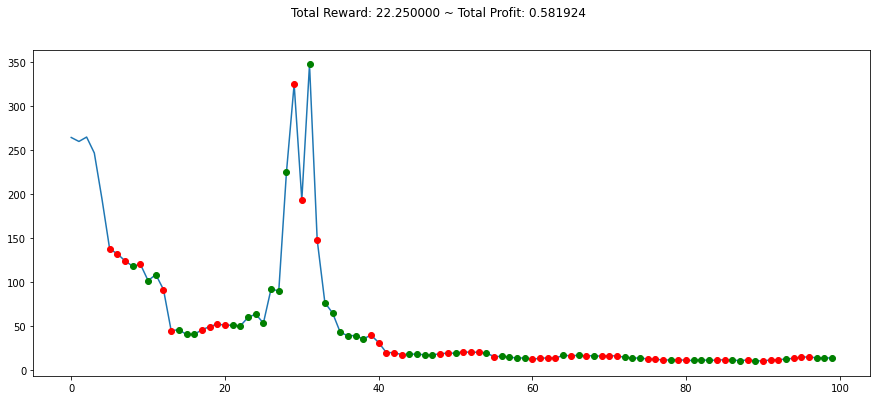

In [8]:
state = env.reset()
while True: 
    action = env.action_space.sample()
    n_state, reward, done, info = env.step(action)
    if done: 
        print("info", info)
        break
        
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()

# Build Env & Train

In [9]:
env_maker = lambda: gym.make('stocks-v0', df=df, frame_bound=(5,100), window_size=5)
env = DummyVecEnv([env_maker])

C:\Users\shakt\.conda\envs\rl_37\lib\site-packages\stable_baselines\common\vec_env\dummy_vec_env.py:32: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  self.buf_dones = np.zeros((self.num_envs,), dtype=np.bool)


In [15]:
model = A2C('MlpLstmPolicy', env, verbose=2) 
model.learn(total_timesteps=1000000)

C:\Users\shakt\.conda\envs\rl_37\lib\site-packages\stable_baselines\common\vec_env\dummy_vec_env.py:32: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  self.buf_dones = np.zeros((self.num_envs,), dtype=np.bool)
C:\Users\shakt\.conda\envs\rl_37\lib\site-packages\tensorflow_core\python\framework\tensor_util.py:521: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  tensor_proto.tensor_content = nparray.tostring()


Wrapping the env in a DummyVecEnv.


C:\Users\shakt\.conda\envs\rl_37\lib\site-packages\tensorflow_core\python\framework\tensor_util.py:521: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  tensor_proto.tensor_content = nparray.tostring()
C:\Users\shakt\.conda\envs\rl_37\lib\site-packages\tensorflow_core\python\framework\tensor_util.py:521: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  tensor_proto.tensor_content = nparray.tostring()
C:\Users\shakt\.conda\envs\rl_37\lib\site-packages\tensorflow_core\python\framework\tensor_util.py:521: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  tensor_proto.tensor_content = nparray.tostring()
C:\Users\shakt\.conda\envs\rl_37\lib\site-packages\tensorflow_core\python\framework\tensor_util.py:521: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  tensor_proto.tensor_content = nparray.tostring()
C:\Users\shakt\.conda\envs\rl_37\lib\site-packages\tensorflow_core\python\framework\tensor_util.py:521: 

---------------------------------
| explained_variance | -0.0329  |
| fps                | 28       |
| nupdates           | 1        |
| policy_entropy     | 0.693    |
| total_timesteps    | 5        |
| value_loss         | 4.63     |
---------------------------------


C:\Users\shakt\.conda\envs\rl_37\lib\site-packages\stable_baselines\a2c\a2c.py:388: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mb_dones = np.asarray(mb_dones, dtype=np.bool).swapaxes(0, 1)


---------------------------------
| explained_variance | -24.4    |
| fps                | 666      |
| nupdates           | 100      |
| policy_entropy     | 0.693    |
| total_timesteps    | 500      |
| value_loss         | 3.22e-05 |
---------------------------------
---------------------------------
| explained_variance | 0.0348   |
| fps                | 695      |
| nupdates           | 200      |
| policy_entropy     | 0.692    |
| total_timesteps    | 1000     |
| value_loss         | 3.26     |
---------------------------------
---------------------------------
| explained_variance | -0.00895 |
| fps                | 731      |
| nupdates           | 300      |
| policy_entropy     | 0.693    |
| total_timesteps    | 1500     |
| value_loss         | 13.5     |
---------------------------------
---------------------------------
| explained_variance | 0.00861  |
| fps                | 753      |
| nupdates           | 400      |
| policy_entropy     | 0.693    |
| total_timest

KeyboardInterrupt: 

In [16]:
env = gym.make('stocks-v0', df=df, frame_bound=(90,110), window_size=5)
obs = env.reset()
while True: 
    obs = obs[np.newaxis, ...]
    action, _states = model.predict(obs)
    obs, rewards, done, info = env.step(action)
    if done:
        print("info", info)
        break

info {'total_reward': 2.16, 'total_profit': 1.102158330497168, 'position': 1}


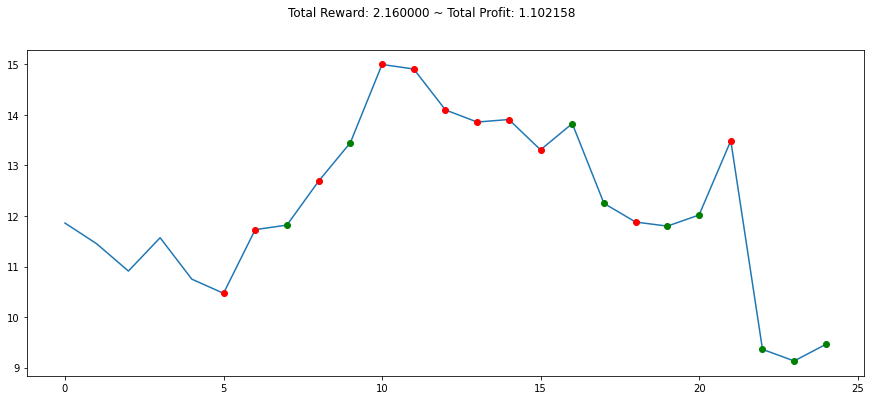

In [17]:
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()